In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')


In [4]:
files = {
    'Benin': '../data/benin_clean.csv',
    'SierraLeone': '../data/sierraleone_clean.csv',
    'Togo': '../data/togo_clean.csv'
}

dfs = {c: pd.read_csv(p, parse_dates=['Timestamp']) for c, p in files.items()}

In [5]:
for country, df in dfs.items():
    print(country, df.shape)
    print(df.columns)

Benin (525600, 34)
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'GHI_z', 'GHI_outlier', 'DNI_z',
       'DNI_outlier', 'DHI_z', 'DHI_outlier', 'ModA_z', 'ModA_outlier',
       'ModB_z', 'ModB_outlier', 'WS_z', 'WS_outlier', 'WSgust_z',
       'WSgust_outlier', 'any_outlier'],
      dtype='object')
SierraLeone (525600, 34)
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'GHI_z', 'GHI_outlier', 'DNI_z',
       'DNI_outlier', 'DHI_z', 'DHI_outlier', 'ModA_z', 'ModA_outlier',
       'ModB_z', 'ModB_outlier', 'WS_z', 'WS_outlier', 'WSgust_z',
       'WSgust_outlier', 'any_outlier'],
      dtype='object')
Togo (525600, 34)
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
   

In [6]:
metrics = ['GHI', 'DNI', 'DHI']
summary_rows = []

for country, df in dfs.items():
    row = {'country': country}
    for m in metrics:
        row[f'{m}_mean'] = df[m].mean()
        row[f'{m}_median'] = df[m].median()
        row[f'{m}_std'] = df[m].std()
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).set_index('country')
summary_df.round(3)


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
country,,,,,,,,,
Benin,241.740,1.8,329.836,167.438,0.0,261.543,112.372,1.6,151.486
SierraLeone,198.689,0.3,289.287,104.664,0.0,201.603,112.421,0.0,151.956
Togo,230.975,2.1,320.780,149.369,0.0,248.554,112.409,2.5,151.293


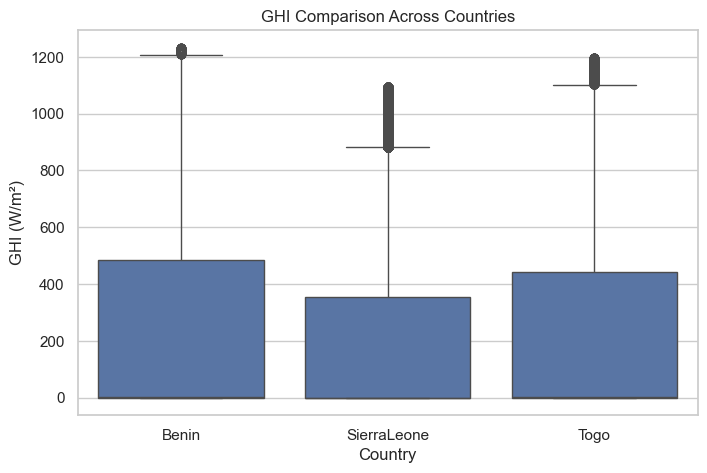

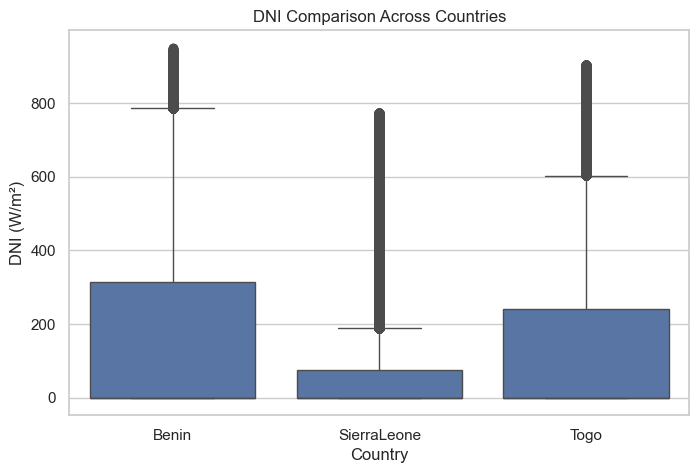

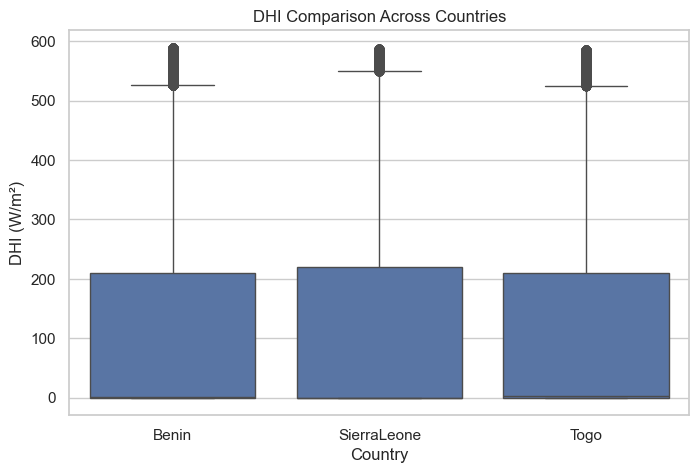

In [9]:
for metric in metrics:
    # Combine all countries’ data into one DataFrame
    df_metric = pd.concat(
        [dfs[country][[metric]].assign(Country=country) for country in dfs.keys()],
        ignore_index=True
    )

    # Plot boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_metric, x='Country', y=metric)
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()


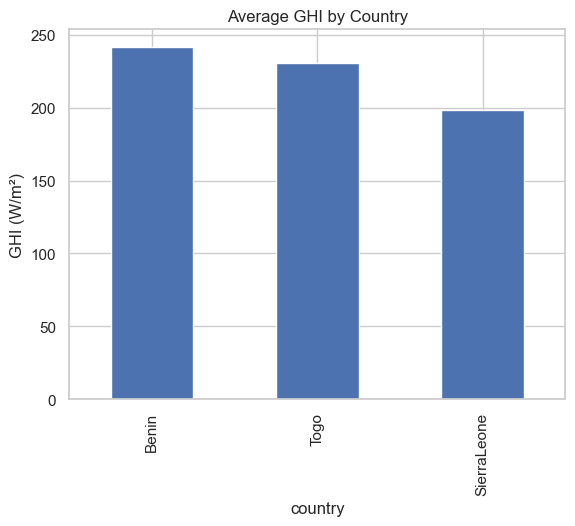

In [10]:
avg_ghi = summary_df['GHI_mean'].sort_values(ascending=False)
avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)')
plt.show()
